<a href="https://colab.research.google.com/github/NerconX/finetuning-senior-project-/blob/main/Senior_Project_Taskspecific_Finetune_Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installation of necessary packages
!pip install transformers==4.31.0
!pip install accelerate==0.21.0
!pip install bitsandbytes==0.40.2
!pip install peft==0.4.0
!pip install datasets
!pip install einops
!pip install torch==2.0.1

# Importing necessary modules from the installed packages
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, TrainingArguments, Trainer, DataCollatorForLanguageModeling
import transformers
from peft import LoraConfig, get_peft_model, prepare_model_for_int8_training
from datasets import load_dataset, Dataset


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00

In [ ]:
model = "ybelkada/falcon-7b-sharded-bf16"

tokenizer = AutoTokenizer.from_pretrained(model, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token


tokenizer_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

In [ ]:
bb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)


In [ ]:
from transformers import FalconForCausalLM

falcon_model = FalconForCausalLM.from_pretrained(
    model,
    quantization_config=bb_config,
    use_cache=False
)

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00008.bin:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

pytorch_model-00002-of-00008.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00003-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00004-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00005-of-00008.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00006-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00007-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00008-of-00008.bin:   0%|          | 0.00/921M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
text = "Question: What is the national bird of the United States? \nAnswer: "

inputs = tokenizer(text, return_tensors="pt").to("cuda:0")
outputs = falcon_model.generate(input_ids=inputs.input_ids, max_new_tokens=10)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

text2 = "How do I make a HTML hyperlink?"

inputs = tokenizer(text2, return_tensors="pt").to("cuda:0")
outputs = falcon_model.generate(input_ids=inputs.input_ids, max_new_tokens=35)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


text3 = "A 25-year-old female presents with swelling, pain, and inability to bear weight on her left ankle following a fall during a basketball game where she landed awkwardly on her foot. The pain is on the outer side of her ankle."

inputs = tokenizer(text3, return_tensors="pt").to("cuda:0")
outputs = falcon_model.generate(input_ids=inputs.input_ids, max_new_tokens=100)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Question: What is the national bird of the United States? 
Answer: 
Question: What is the national bird of the


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


How do I make a HTML hyperlink?
How do I make a HTML hyperlink?
How to Create a Hyperlink in HTML
- Step 1: Create a Hyperlink.
- Step 2:
A 25-year-old female presents with swelling, pain, and inability to bear weight on her left ankle following a fall during a basketball game where she landed awkwardly on her foot. The pain is on the outer side of her ankle. She has no history of trauma to her ankle. She has no history of ankle sprains. She has no history of ankle surgery. She has no history of ankle fractures. She has no history of ankle dislocations. She has no history of ankle arthritis. She has no history of ankle instability. She has no history of ankle tendonitis. She has no history of ankle tendon rupture. She has no history of ankle ligament injury. She has no history of ankle ligament rupture. She has no


In [ ]:
training_args = TrainingArguments(
    output_dir="./finetuned_falcon",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    fp16=True,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=1,
    logging_steps=1,
    num_train_epochs=1,
    optim="paged_adamw_8bit"
)



In [ ]:
# Enabling gradient checkpointing for the model
falcon_model.gradient_checkpointing_enable()

# Preparing the model for int8 training
falcon_model = prepare_model_for_int8_training(falcon_model)

# Configuring the LoRA parameters
lora_config = LoraConfig(
    r=4,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=[
        "query_key_value",
        "dense",
        "dense_h_to_4h",
        "dense_4h_to_h",
    ]
)

# Applying the LoRA configuration to the model
lora_model = get_peft_model(falcon_model, lora_config)


/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

print_trainable_parameters(falcon_model)

trainable params: 8159232 || all params: 3616904064 || trainable%: 0.22558607736409123


In [ ]:
dataset = load_dataset("BI55/MedText", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

# Assuming 'dataset' is a previously defined variable that contains the data
df = pd.DataFrame(dataset)

# Extracting 'Prompt' and 'Completion' columns from the DataFrame and then removing them
prompt = df.pop("Prompt")
comp = df.pop("Completion")

# Creating a new column 'Info' by concatenating 'Prompt' and 'Completion' with a newline character in between
df["Info"] = prompt + "\n" + comp


In [ ]:
def tokenizing(text, tokenizer, chunk_size, maxlen):
    input_ids = []
    tt_ids = []
    at_ids = []

    for i in range(0, len(text), chunk_size):
        text_chunk = text[i:i+chunk_size]
        encs = tokenizer(
            text_chunk,
            max_length=2048,
            padding='max_length',
            truncation=True
        )

        input_ids.extend(encs['input_ids'])
        tt_ids.extend(encs['token_type_ids'])
        at_ids.extend(encs['attention_mask'])

    return {'input_ids': input_ids, 'token_type_ids': tt_ids, 'attention_mask': at_ids}


In [ ]:
# Assuming 'df' is a DataFrame and 'tokenizing' is a previously defined function
tokens = tokenizing(list(df["Info"]), tokenizer, 256, 2048)

# Creating a dataset from the tokens dictionary
tokens_dataset = Dataset.from_dict(tokens)

# Splitting the dataset into train and test sets
split_dataset = tokens_dataset.train_test_split(test_size=0.2)

# Displaying the split dataset
split_dataset


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1129
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 283
    })
})

In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling
import matplotlib.pyplot as plt

# Set the number of epochs
num_epochs = 3

# Define training arguments
training_args = TrainingArguments(
    output_dir="temp",
    evaluation_strategy="epoch",
    learning_rate=1e-3,
    gradient_accumulation_steps=1,
    per_device_train_batch_size=8,  # You may adjust this according to your hardware
    per_device_eval_batch_size=8,   # You may adjust this according to your hardware
    num_train_epochs=num_epochs,
    save_steps=500,  # Adjust based on your preference
    save_total_limit=2,  # Adjust based on how many checkpoints you wish to keep
    logging_dir='./logs',
    logging_steps=50,
)

# Initialize the Trainer
trainer = Trainer(
    model=lora_model,  # Make sure lora_model is the model you've prepared for training
    args=training_args,
    train_dataset=split_dataset["train"],
    eval_dataset=split_dataset["test"],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)  # Assuming tokenizer is defined
)

# Train the model
trainer.train()
trainer.model.save_pretrained("/content/finetuned_falcon")

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.757200,1.534094
2,0.535000,1.535655
3,0.287700,1.730110


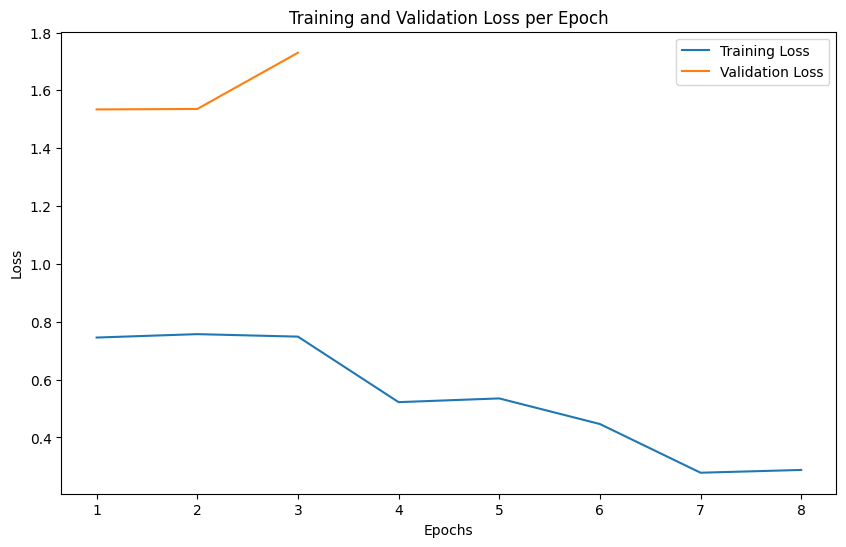

In [ ]:
# Extracting loss values for plotting
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# Number of epochs should match the longer of the two lists
num_epochs = max(len(training_loss), len(validation_loss))
epochs = range(1, num_epochs + 1)

# Plotting code
plt.figure(figsize=(10, 6))

# Plot Training Loss if available
if training_loss:
    plt.plot(epochs[:len(training_loss)], training_loss, label='Training Loss')

# Plot Validation Loss if available
if validation_loss:
    plt.plot(epochs[:len(validation_loss)], validation_loss, label='Validation Loss')

plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from peft import PeftConfig, PeftModel

# Load the fine-tuned model configuration and model
config = PeftConfig.from_pretrained('/content/finetuned_falcon')
finetuned_model = PeftModel.from_pretrained(falcon_model, '/content/finetuned_falcon')

# Inference with the fine-tuned model
text4 = "A 25-year-old female presents with swelling, pain, and inability to bear weight on her left ankle following a fall during a basketball game where she landed awkwardly on her foot. The pain is on the outer side of her ankle."

inputs = tokenizer(text4, return_tensors="pt").to("cuda:0")
outputs = finetuned_model.generate(input_ids=inputs.input_ids, max_new_tokens=75)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


A 25-year-old female presents with swelling, pain, and inability to bear weight on her left ankle following a fall during a basketball game where she landed awkwardly on her foot. The pain is on the outer side of her ankle. What is the likely diagnosis and what are the next steps?
This patient's history and symptoms suggest a lateral ankle sprain, which involves damage to the ligaments on the outer side of the ankle. The next steps should include rest, ice, compression, and elevation (RICE) to help reduce pain and swelling. Over-the-counter pain relievers


In [ ]:
text5 = "A 60-year-old woman with a history of hyperthyroidism now complains of fatigue, shortness of breath, and swelling of her ankles. On examination, her pulse is irregular and rapid."

inputs = tokenizer(text5, return_tensors="pt").to("cuda:0")
outputs = finetuned_model.generate(input_ids=inputs.input_ids, max_new_tokens=75)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


A 60-year-old woman with a history of hyperthyroidism now complains of fatigue, shortness of breath, and swelling of her ankles. On examination, her pulse is irregular and rapid. What could be the cause and what are the next steps?
This patient's symptoms and physical exam findings, in the context of her history of hyperthyroidism, suggest she may have developed atrial fibrillation leading to tachycardia-induced cardiomyopathy and heart failure. The next steps would be to confirm the diagnosis of atrial fibrillation, perform an echocardi


In [ ]:
text6 = "A 45-year-old male presents with severe rectal pain, especially during bowel movements."

inputs = tokenizer(text6, return_tensors="pt").to("cuda:0")
outputs = finetuned_model.generate(input_ids=inputs.input_ids, max_new_tokens=75)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


A 45-year-old male presents with severe rectal pain, especially during bowel movements. On examination, a painful, swollen mass is visible on the anal verge. What is the likely diagnosis and what would be the treatment?
The patient's symptoms suggest the presence of an external thrombosed hemorrhoid, which occurs when a blood clot forms in an external hemorrhoid, leading to severe pain and swelling. Immediate treatment options include conservative measures like sitz baths,
